# Real Estate Sales

## Aim: To predict the Sale Amount in Connecticut US State.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame=pd.read_csv('final_data.csv')

In [3]:
data_frame.head()

,Town,Address,Property Type,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio
0,93,0,14,19029,2,2,202200.0,284000.0,0.7120
1,124,577418,9,190189,2,1,134460.0,173800.0,0.7736
2,124,391996,14,190352,2,1,207450.0,317500.0,0.6534
3,47,391995,14,190033,2,2,111480.0,229900.0,0.4849
4,41,391994,14,190056,2,1,323020.0,560000.0,0.5768


In [4]:
data_frame.isnull().sum()

Town              0
Address           0
Property Type     0
Serial Number     0
List Year         0
Date Recorded     0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
x=data_frame.drop(['Sale Amount'],axis=1)
y=data_frame['Sale Amount']

In [7]:
model=RandomForestRegressor()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [10]:
model.score(x_test,y_test)

0.9541578407746407

In [11]:
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

## Checking the error rate for Random Forest Regressor

In [12]:
kf = KFold(n_splits=20,shuffle=True) # defining fold parameter
 # created empty list to append score and error
training_error = []
training_accuracy = []
testing_error = []
testing_accuracy = []
for train_index,test_index in kf.split(x):
     #get the prediction for train and test data 
    train_data_pred = model.predict(x_train)
    test_data_pred = model.predict(x_test)
     #appending the errors to the list
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
     #appending the accuracy to the list
    training_accuracy.append(model.score(x_train,y_train))
    testing_accuracy.append(model.score(x_test,y_test))

Text(0.5, 1.0, 'Testing accuracy across folds')

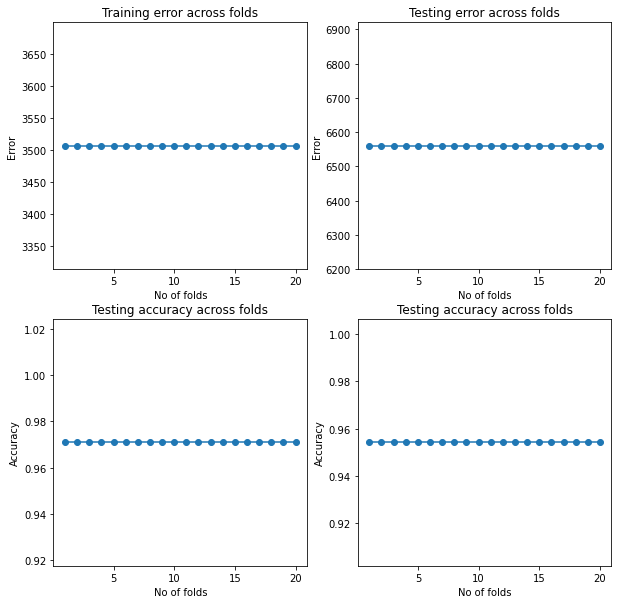

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

## Linear Regression

In [12]:
linear_model=LinearRegression()

In [15]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [16]:
linear_model.score(x_test,y_test)

0.13987609811077695

## Lasso

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso=Lasso()

In [19]:
lasso.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0882367553855375e+18, tolerance: 235923808154862.5
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [20]:
lasso.score(x_test,y_test)

0.13987621887043855

## XGBoostRegressor

In [22]:
from xgboost import XGBRegressor

In [23]:
xgb=XGBRegressor()

In [24]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
xgb.score(x_test,y_test)

0.892946779924441

Text(0.5, 1.0, 'Testing accuracy across folds')

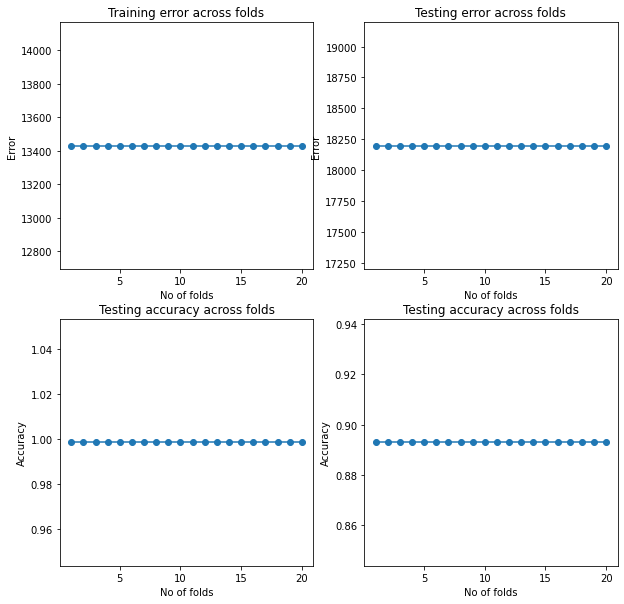

In [26]:
kf = KFold(n_splits=20,shuffle=True) # defining fold parameter
 # created empty list to append score and error
training_error = []
training_accuracy = []
testing_error = []
testing_accuracy = []
for train_index,test_index in kf.split(x):
     #get the prediction for train and test data 
    train_data_pred = xgb.predict(x_train)
    test_data_pred = xgb.predict(x_test)
     #appending the errors to the list
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
     #appending the accuracy to the list
    training_accuracy.append(xgb.score(x_train,y_train))
    testing_accuracy.append(xgb.score(x_test,y_test))
    

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Training error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')